# Case Study 1 - How Does a Bike-Share Navigate Speedy Success

## 1. Ask

● What is the problem you are trying to solve?
● How can your insights drive business decisions?

1. Identify the business task
2. Consider key stakeholders

### 1.1 Hypothesis

Casual members dont believe they will use their membership to its fullest as casual cyclist therefore will only hire on a requirement basis. 

The data will provide an insight into the usage of casual users and members. The analysis will look at the rental periods of the different users. As cycling is an outdoor activity, the analysis will focus on the usage throughout the week, and the effects of seasonal weather on usage. 

Key Stakeholders is Lily Moreno, Director of Marketing at Cyclistic.

## 2. Prepare

● Where is your data located?
● How is the data organized?
● Are there issues with bias or credibility in this data? Does your data ROCCC?
● How are you addressing licensing, privacy, security, and accessibility?
● How did you verify the data’s integrity?
● How does it help you answer your question?
● Are there any problems with the data?

1. Download data and store it appropriately.
2. Identify how it’s organized.
3. Sort and filter the data.
4. Determine the credibility of the data.

### 2.1 Data Organisation

Usage data will be obtained from internal company database. The data will be stored on local storage of the analyst. The data has been stored by month. The analyst will import the data into jupyter notebook to be sorted and cleaned for analysis. 

### 2.2 Data Credibility

Data was obtained from company databases that were collected from members and casual usage, therefore is highly reliable. Overviewing a months worth of datapoint shows roughly 500000 point, so we can conclude that the data set has wide coverage. 

Using the ROCCC analysis below:
* Reliability: The data is obtained first-hand from the company database. There is a large sample size per month of data. The data points are comprehensive. I can be concluded that the dataset is reliable.

* Originality: This data set is original as it is collected first-hand by company from the userbase.

* Comprehensizeness: The data is comprehensive as it has over 500000 data points per month, with a total of over 5 million data points from the years worth.

* Current: The data is current. The data obtained is 12 months back from the current month. 

* Cited: The dataset is obtained directly from the original owner. 

In [1]:
# Import packages

import pandas as pd
import numpy as np

import glob

In [2]:
# Set data import path

path = glob.glob('*.csv')

In [3]:
# Load all 12 months data and concatenate into single dataframe

for i, file in enumerate(path):
    if i == 0:
        df = pd.read_csv(file)
    else:
        df_load = pd.read_csv(file)
        df = pd.concat([df, df_load], ignore_index = True, sort = False)

In [4]:
# Overview of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5378834 entries, 0 to 5378833
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 533.5+ MB


In [5]:
# Check columns(features) for null values

df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    600479
start_station_id      600586
end_station_name      646471
end_station_id        646548
start_lat                  0
start_lng                  0
end_lat                 4831
end_lng                 4831
member_casual              0
dtype: int64

## 3. Process

● What tools are you choosing and why?
● Have you ensured your data’s integrity?
● What steps have you taken to ensure that your data is clean?
● How can you verify that your data is clean and ready to analyze?
● Have you documented your cleaning process so you can review and share those results?

1. Check the data for errors.
2. Choose your tools.
3. Transform the data so you can work with it effectively.
4. Document the cleaning process.

### 3.1 Tools
I will be using python 3.7 with pandas package to clean and analyse the data from Cyclistic, as I am familiar with the tools. The pandas package is a comprehensive package with plenty of users and support.

### 3.2 Missing values
The data was initially checked for missing values. It was found that start-station, start-station-id, end-station and end-station id were the main offenders in missing values, with about 600000 entries missing values. 

There were also missing values from the end_latitude and end_longitude columns. This will have to be addressed if a more in depth analysis is required.

### 3.3 Corresponding values
The data also showed different latitude and longitude for a single station-id. This was found in both start_station and end_station. 

We can therefore recommend that the latitude and longitude values be a fixed value corresponding to a station_id rather than a live gps measurement at the point of start of hire and end of hire. 

### 3.4 Convert to date time object
As the start and end date was provided as a string, we can use the pandas library to convert the values to date time objects for better analysis. Once converted, we took the difference of the end-date and start-date to determine the lenght of hire by the userbase. 

Doing this identified another error in the data input, as quite a large number of data had a negative time delta which indicates that the start and end date were swapped during data input. I fixed this by identifying the data points with negative time delta, and swapped the start and end date. 

### 3.5 Creating new features
I then used the date time objects to introduce a new column where the day of hire was calculated from the date time object. 

I also used the start hire date time object to calculate the season of which the cyclist hired the bicycle.

### 3.6 Data cleaning complete
At this stage, I considered that the data cleaning and feature additions to be sufficient for the required analysis. Any further cleaning and additions can be added if a more in depth analysis is required. 

In [6]:
# Create new df_1 dataframe for initial data clean up
df_1 = df

# Convert to datetime object
df_1.started_at = pd.to_datetime(df_1.started_at)
df_1.ended_at = pd.to_datetime(df_1.ended_at)

# Calculate ride lenght and day of occurence
df_1['ride_length'] = df_1.ended_at - df_1.started_at

# Use package function to find the day of hire
df_1['day_of_week'] = df_1['started_at'].dt.day_name()
df_1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,41.894434,-87.623379,casual,0 days 00:09:40,Sunday
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,41.900675,-87.662480,casual,0 days 00:11:19,Sunday
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,41.872054,-87.629550,casual,0 days 00:29:01,Sunday
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,41.917744,-87.691392,casual,0 days 00:09:15,Sunday
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,41.876448,-87.620338,casual,0 days 00:33:27,Sunday


In [7]:
# Check the dataframe column types after conversion to date time object.

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5378834 entries, 0 to 5378833
Data columns (total 15 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  ride_length         timedelta64[ns]
 14  day_of_week         object         
dtypes: datetime64[ns](2), float64(4), object(8), timedelta64[ns](1)
memory usage: 615.6+ MB


In [8]:
# Use describe function to calculate statistical values of relevant column

df_1.describe()

,start_lat,start_lng,end_lat,end_lng,ride_length
count,5.378834e+06,5.378834e+06,5.374003e+06,5.374003e+06,5378834
mean,4.190179e+01,-8.764576e+01,4.190207e+01,-8.764598e+01,0 days 00:20:29.374965280
std,4.548065e-02,2.801962e-02,4.558547e-02,2.819680e-02,0 days 04:59:59.531975398
min,4.164000e+01,-8.784000e+01,4.151000e+01,-8.807000e+01,-21 days +19:50:02
25%,4.188189e+01,-8.766000e+01,4.188209e+01,-8.766000e+01,0 days 00:06:58
50%,4.189964e+01,-8.764178e+01,4.190000e+01,-8.764253e+01,0 days 00:12:23
75%,4.192914e+01,-8.762772e+01,4.192955e+01,-8.762775e+01,0 days 00:22:26
max,4.208000e+01,-8.752000e+01,4.216812e+01,-8.744000e+01,38 days 20:24:09


As seen from table above, the min value for ride lenght has a negative value. We can make an assumption that some of the start and end date were placed in the wrong column. We will locate the data row corresponding to the min value to check if the assumption is valid. 

In [9]:
# Observed negative ride_length, most likely due to data input error. Locate corresponding data and check date input. 

df_1.iloc[df_1['ride_length'].idxmin(), :]

ride_id                     3ED2B8BCE6A914EF
rideable_type                  electric_bike
started_at               2020-12-15 12:10:14
ended_at                 2020-11-25 08:00:16
start_station_name     Wells St & Concord Ln
start_station_id                TA1308000050
end_station_name      Clark St & Schiller St
end_station_id                  TA1309000024
start_lat                           41.91196
start_lng                         -87.634798
end_lat                            41.907917
end_lng                           -87.631583
member_casual                         member
ride_length               -21 days +19:50:02
day_of_week                          Tuesday
Name: 320879, dtype: object

We can see from the start and end date above, that the end date is earlier then the start date. We will create a function to change the start and end date for data rows which have an earlier start date. 

In [10]:
# Create df_2 dataframe to store date swaps, only swapping dates with negative time delta

df_2 = df_1

In [11]:
# Create function for swapping dates with negative time delta

def swap_dates(row):
    if row.started_at < row.ended_at:
        return row
    else:
        temp = row.ended_at
        row.ended_at = row.started_at
        row.started_at = temp
        return row

df_2 = df_1.apply(swap_dates, axis = 1)

df_2.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,41.894434,-87.623379,casual,0 days 00:09:40,Sunday
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,41.900675,-87.662480,casual,0 days 00:11:19,Sunday
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,41.872054,-87.629550,casual,0 days 00:29:01,Sunday
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,41.917744,-87.691392,casual,0 days 00:09:15,Sunday
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,41.876448,-87.620338,casual,0 days 00:33:27,Sunday


In [12]:
# Recalculate the ride length after swapping dates
df_2['ride_length'] = df_2.ended_at - df_2.started_at

# Recalculate start hire day
df_2['day_of_week'] = df_2['started_at'].dt.day_name()

df_2.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,41.894434,-87.623379,casual,0 days 00:09:40,Sunday
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,41.900675,-87.662480,casual,0 days 00:11:19,Sunday
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,41.872054,-87.629550,casual,0 days 00:29:01,Sunday
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,41.917744,-87.691392,casual,0 days 00:09:15,Sunday
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,41.876448,-87.620338,casual,0 days 00:33:27,Sunday


In [13]:
# Using the describe function to check the dataframe after date convertion
df_2.describe()

,start_lat,start_lng,end_lat,end_lng,ride_length
count,5.378834e+06,5.378834e+06,5.374003e+06,5.374003e+06,5378834
mean,4.190179e+01,-8.764576e+01,4.190207e+01,-8.764598e+01,0 days 00:24:30.483144116
std,4.548065e-02,2.801962e-02,4.558547e-02,2.819680e-02,0 days 04:59:41.440246557
min,4.164000e+01,-8.784000e+01,4.151000e+01,-8.807000e+01,0 days 00:00:00
25%,4.188189e+01,-8.766000e+01,4.188209e+01,-8.766000e+01,0 days 00:06:58
50%,4.189964e+01,-8.764178e+01,4.190000e+01,-8.764253e+01,0 days 00:12:23
75%,4.192914e+01,-8.762772e+01,4.192955e+01,-8.762775e+01,0 days 00:22:26
max,4.208000e+01,-8.752000e+01,4.216812e+01,-8.744000e+01,38 days 20:24:09


The minimum ride lenght is now not a negative value after the start and end date swap.

In [14]:
# Observing the row data containing the minimum ride lenght
df_2.iloc[df_2['ride_length'].idxmin(), :]

ride_id                        D7486526459BC845
rideable_type                     electric_bike
started_at                  2020-11-22 12:48:48
ended_at                    2020-11-22 12:48:48
start_station_name    Milwaukee Ave & Grand Ave
start_station_id                           84.0
end_station_name                            NaN
end_station_id                              NaN
start_lat                             41.891557
start_lng                             -87.64821
end_lat                                   41.89
end_lng                                  -87.65
member_casual                            casual
ride_length                     0 days 00:00:00
day_of_week                              Sunday
Name: 1727, dtype: object

## 4. Analyze

● How should you organize your data to perform analysis on it?
● Has your data been properly formatted?
● What surprises did you discover in the data?
● What trends or relationships did you find in the data?
● How will these insights help answer your business questions?

1. Aggregate your data so it’s useful and accessible.
2. Organize and format your data.
3. Perform calculations.
4. Identify trends and relationships.

In [15]:
# Average ride lenght
df_2['ride_length'].mean()

Timedelta('0 days 00:24:30.483144116')

In [16]:
# The maximum ride lenght undertaken by rider
df_2['ride_length'].max()

Timedelta('38 days 20:24:09')

In [17]:
df_2.iloc[df_2['ride_length'].idxmax(), :]

ride_id                                 F043F0F6A1AA4F85
rideable_type                                docked_bike
started_at                           2021-06-05 02:27:26
ended_at                             2021-07-13 22:51:35
start_station_name                Michigan Ave & Lake St
start_station_id                            TA1305000011
end_station_name      Malcolm X College Vaccination Site
end_station_id                                       631
start_lat                                      41.886024
start_lng                                     -87.624117
end_lat                                        41.877618
end_lng                                       -87.673895
member_casual                                     casual
ride_length                             38 days 20:24:09
day_of_week                                     Saturday
Name: 2230787, dtype: object

In [18]:
# The day when there were more bicycles on hire
df_2['day_of_week'].mode()

0    Saturday
dtype: object

### 4.1 Initial Findings

From the information above, we can state the following:
* The average length of hire by both members and casual hires is 25 minutes.
* The longest hire was 39 days by a casual hire.
* The day of which most hires occured is on Saturdays.

### 4.2 Pivot tables

In [19]:
# Create dataframe from df_2 for pivot tables
pivot_1_subset = df_2

In [20]:
# Casual riders and members vs average ride length
pivot_1_subset['ride_length'] = [td.total_seconds() for td in pivot_1_subset['ride_length']]

pivot_1 = pd.pivot_table(pivot_1_subset, values='ride_length', index=['member_casual'], aggfunc=np.mean)

pivot_1

,ride_length
member_casual,
casual,2008.003164
member,1013.878054


In [21]:
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Membership variables and their activity during each day of the week
pivot_2 = pivot_1_subset[['member_casual', 'day_of_week','ride_length']].pivot_table(columns='member_casual', values='ride_length', index='day_of_week', aggfunc=np.mean).loc[weekdays][::-1]

pivot_2

member_casual,casual,member
day_of_week,,
Saturday,2109.266100,933.164879
Friday,1854.438335,819.541076
Thursday,1698.141560,793.761617
Wednesday,2188.027788,1935.316800
Tuesday,1717.080569,786.133927
Monday,1939.066741,810.965780
Sunday,2286.177211,954.968070


In [22]:
# Membership variables and tendency to hire bicycles based on day of the week
pivot_1_subset['day'] = pivot_1_subset['day_of_week'].to_string

pivot_3 = pivot_1_subset[['member_casual','day_of_week']].pivot_table(columns = 'member_casual', index='day_of_week', aggfunc=len, fill_value=0).loc[weekdays]

pivot_3

member_casual,casual,member
day_of_week,,
Sunday,476195,368494
Monday,278268,391381
Tuesday,264271,431550
Wednesday,267563,444684
Thursday,277345,425673
Friday,354993,425245
Saturday,551882,421290


### 4.3 Introduce seasons as a feature

In [23]:
# Create df_3 dataframe to add seasons as a feature
df_3 = df_2

In [24]:
# Create function to calculate seasons based on hire start date

def get_season(row):
    if row['started_at'].month >= 3 and row['started_at'].month <= 5:
        return 'Spring'
    elif row['started_at'].month >= 6 and row['started_at'].month <= 8:
        return 'Summer'
    elif row['started_at'].month >= 9 and row['started_at'].month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

In [25]:
# Apply function to df_3

df_3['season'] = df_3.apply(get_season, axis = 1)

df_3.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,day,season
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,41.894434,-87.623379,casual,580.0,Sunday,<bound method Series.to_string of 0 ...,Autumn
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,41.900675,-87.662480,casual,679.0,Sunday,<bound method Series.to_string of 0 ...,Autumn
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,41.872054,-87.629550,casual,1741.0,Sunday,<bound method Series.to_string of 0 ...,Autumn
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,41.917744,-87.691392,casual,555.0,Sunday,<bound method Series.to_string of 0 ...,Autumn
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,41.876448,-87.620338,casual,2007.0,Sunday,<bound method Series.to_string of 0 ...,Autumn


In [26]:
# Create pivot dataframe from df_3
pivot_2_subset = df_3.drop(columns = ['day'])

seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
# Membership status and hires by seasons
pivot_4 = pivot_2_subset[['member_casual', 'season']].pivot_table(index='season', columns='member_casual', aggfunc=len, fill_value=0).loc[seasons]

pivot_4

member_casual,casual,member
season,,
Winter,58249,219402
Spring,477550,619809
Summer,1225408,1130949
Autumn,709310,938157


### 4.4 Pivot tables summary
Pivot tables were generated as listed below:
* Average time period of hire by members and casual riders
* Average hire of members and casual riders based on day of the week
* The total number of hires by the day of the week by members and casual riders 
* The total number of hires by seasons by members and casual riders

## 5. Share

● Were you able to answer the question of how annual members and casual riders use Cyclistic bikes differently?
● What story does your data tell?
● How do your findings relate to your original question?
● Who is your audience? What is the best way to communicate with them?
● Can data visualization help you share your findings?
● Is your presentation accessible to your audience?

1. Determine the best way to share your findings.
2. Create effective data visualizations.
3. Present your findings.
4. Ensure your work is accessible.

### 5.1 Data Visualisation

In [27]:
# Import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set()

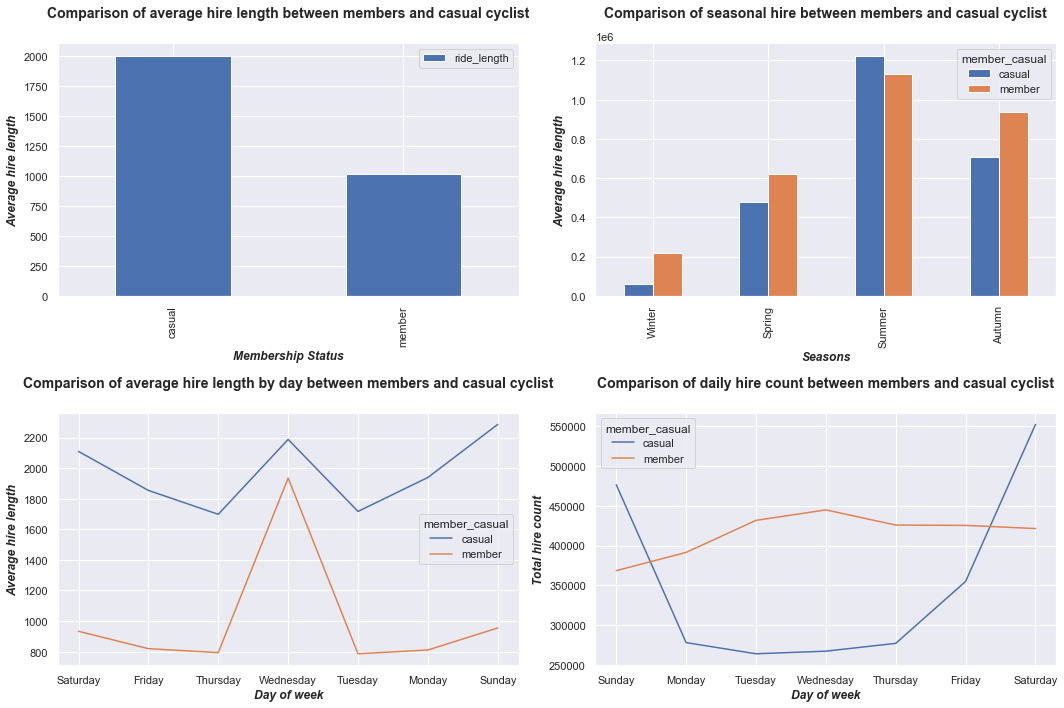

In [28]:
# Plot pivot tables into charts
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

pivot_1.plot(kind='bar', ax=axs[0,0])
axs[0,0].set_title('Comparison of average hire length between members and casual cyclist', fontweight='bold', fontsize = 14, y=1.08)
axs[0,0].set_xlabel('Membership Status', fontweight='bold', style = 'italic')
axs[0,0].set_ylabel('Average hire length', fontweight='bold', style = 'italic')

pivot_2.plot(kind='line', ax=axs[1,0])
axs[1,0].set_title('Comparison of average hire length by day between members and casual cyclist', fontweight='bold', fontsize = 14, y=1.08)
axs[1,0].set_xlabel('Day of week', fontweight='bold', style = 'italic')
axs[1,0].set_ylabel('Average hire length', fontweight='bold', style = 'italic')

pivot_3.plot(kind='line', ax=axs[1,1])
axs[1,1].set_title('Comparison of daily hire count between members and casual cyclist', fontweight='bold', fontsize = 14, y=1.08)
axs[1,1].set_xlabel('Day of week', fontweight='bold', style = 'italic')
axs[1,1].set_ylabel('Total hire count', fontweight='bold', style = 'italic')

pivot_4.plot(kind='bar', ax=axs[0,1])
axs[0,1].set_title('Comparison of seasonal hire between members and casual cyclist', fontweight='bold', fontsize = 14, y=1.08)
axs[0,1].set_xlabel('Seasons', fontweight='bold', style = 'italic')
axs[0,1].set_ylabel('Average hire length', fontweight='bold', style = 'italic')

fig.tight_layout()

### 5.2 Summary from all analysis

From the initial observation, we can state the following:
* The average length of hire by both members and casual hires is 25 minutes.
* The longest hire was 39 days by a casual hire.
* The day of which most hires occured is on Saturdays.

Pivot charts were generated using the dataframe as listed below, observations were noted per pivot chart:
* Average time period of hire by members and casual riders
    * The data indicates that casual hires were hiring for longer periods of time compared to members.

* Average hire of members and casual riders based on day of the week
    * The average hire periods of casual hires were observed to be higher than members and were consistent throughout the week.
    * Average member hire periods were lower than casual hires throughout the week, but there is a jump on hire lenght on Wednesday.  
    
* The total number of hires by the day of the week by members and casual riders 
    * The total number of hires by casual riders were higher over the weekend, with significant drops on weekdays.
    * Member highers were consistent through out the week but was slightly lower on Sundays.
    
* The total number of hires by seasons by members and casual riders
    * A consistent trend was observed in both casual and member hires, where the highest hires occured in summers and the lowest hires occured in winters.
    
### 5.3 Discussion
It can be concluded that the casual hires of Cyclistic hires the bicycles for longer periods of time compared to members. This is due to different requirements between the members and casual hires.

The trend in member hires points towards travel for work while casual hires tended to weekend outdoor activity usage. This can be seen in the daily hire count where casual hires spiked upwards towards the weekend but remains low over the weekdays. 

This differs from Cyclistic members where the total hire remains roughly the same throughout the week, infering that members used the bicycles on weekdays for travel and outdoor activity during the weekend. 

Seasonal change results in the same hire behaviour for both casual and members where the lowest number of hires occurs during winter, and trended upwards when going into spring and summer. The hire count then drops when going into Autumn months, bottoming out during winter. It can be observed that casual hires tended to be higher then members in the summer months due to good weather for outdoor activities.

### 5.4 Recommendations
From the analysis, we can recommend that any marketing drive by Cyclistic starts in the spring months to encourage activities in the summer. 

We can provide information of usage behaviours to encourage casual hires to sign up for the annual membership showing that over the course of the year, casual hires actually have higher usage of the bicycles. This can help remove doubts that casual users do not fully utilize the annual membership over the course of the year. 

Further encouragement can also be provided by showing the savings by signing up for an annual membership compared to hiring on a requirement basis. 

This concludes the case study for Cyclistic requirements for increased annual membership.

## 6. Act

● What is your final conclusion based on your analysis?
● How could your team and business apply your insights?
● What next steps would you or your stakeholders take based on your findings?
● Is there additional data you could use to expand on your findings?

1. Create your portfolio.
2. Add your case study.
3. Practice presenting your case study to a friend or family member.

### 6.1 Recommendations
From the analysis, we can recommend that any marketing drive by Cyclistic starts in the spring months to encourage activities in the summer. 

We can provide information of usage behaviours to encourage casual hires to sign up for the annual membership showing that over the course of the year, casual hires actually have higher usage of the bicycles. This can help remove doubts that casual users do not fully utilize the annual membership over the course of the year. 

Further encouragement can also be provided by showing the savings by signing up for an annual membership compared to hiring on a requirement basis. 

This concludes the case study for Cyclistic requirements for increased annual membership.